# Primer trabajo práctico Señales y sistemas

## *Función sintetización de un impulso*

- *Gonzalez Leonardo*
- *Rode Valentin* 
- *Córsico Justo*

Para el primer punto se pedía, como objetivo general, sintetizar un impulso a partir de la multiplicación de un sine sweep y un filtro inverso. 
Lo primero que se logró fue generar el sine sweep, no sin antes importar las librerias necesarias:

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import simpleaudio as sa
from scipy.io import wavfile
import pandas as pd
import soundfile as sf


Entendiendo a un sine sweep como una señal senoidal cuya frecuencia varía con el tiempo, fue necesario: definir el rango de frecuencias sobre el cual la señal iba a variar (w1-w2), el tiempo de duracion de la señal (T). Con estos parametros como punto de partida fue posible definir otras constantes que definieron nuestra señal. Los parametros que relacionan los valores de entrada con nuestra señal son los siguientes:



$$R=ln\frac{w2}{w1} [1]$$

$$L = \frac{T}{R} [2]$$

$$K = \frac{Tw1}{R} [3]$$

$$f(x) = sin[\Phi (t)] = sin[K(\exp{\frac{t}{L}}-1)] [4]$$

Para que el usuario pueda definir estos parametros iniciales se creó la función 'get_data':

In [9]:
def get_data():
    f1 = int(input('Ingrese frecuencia inferior:'))
    f2 = int(input('Ingrese frecuencia superior:'))
    T = int(input('Ingrese T: '))
    return (f1, f2, T)

Una vez definidos estos valores, se usaron como variables de entrada para la función que definió nuestra señal "sine sweep", llamada 'get_signal':

In [10]:
def get_signal(f1, f2, T):
    w1 = 2 * np.pi * f1
    w2 = 2 * np.pi * f2
    w1=2*np.pi*f1
    w2=2*np.pi*f2   
    R = np.log(w2/w1)
    K = float((T*w1)/R) 
    L = T/R
    fs=44100
    t = np.linspace(0,T,T*fs)
    f = np.sin(K*(np.exp(t/L)-1))
    return (f, t, R, K, L, w1, fs)

Notese que en esta función se definió la variable 'fs' (sample rate), fundamental para determinar la duración de la señal. Para esto se utilizó la función linespace de numpy. La misma determina un rango (de 0 a T, con los primeros dos parametros) y a la vez un numero total de intervalos (muestras), ya que al multiplicar T (segundos) por fs (muestras sobre segundo) obtenemos el númetro total de muestras.

La siguiente función sirvió para que la señal no supere los valores máximos y mínimos de 1 y -1, respectivamente. Dicho de otra manera, se normalizó la señal. Para lograr esto se realizó la division entre la señal sobre su valor absoluto máximo:

In [11]:
def norm_signal(f):
    g = f / np.max(np.abs(f))
    return (g)


Una vez sintetizado el sine sweep se pasó a hacer lo mismo con el filtro invertido. Este se trata de una señal senoidal cuyas amplitud y frecuencia van decayendo con el tiempo. Para su generación se multiplicó el sine sweep generado anteriormente pero invertido con una función mt, dada por:
Así ssi (sine sweep invertido) y mt fueron los valores de salida:

In [12]:
def get_fi(f, K, L, T, t, w1):
    ssi = np.flip(f)
    wt = (K/L)*np.exp(t/L)
    mt = w1/(2*np.pi*wt)
    kt = mt*ssi
    return (kt, ssi)

Finalmente se convolucionaron el sine sweep y el filtro invertido para obtener el impulso. El mismo devería verse graficado como una función sync:

In [13]:
def get_convolve(f, kt):
    conv = np.convolve(f, kt)
    return(conv)

A continuación, la función utilizada para graficar cada una de las señales:

In [14]:
def get_plot(t, f, ssi, kt, conv):
    plt.plot(t,f)
    plt.title('Sine Sweep')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.show()

    plt.plot(t, ssi)
    plt.title('Filtro Invertido')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.show()
    
    plt.plot(t, kt)
    plt.title('Sine Sweep Invertido')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.show()
    
    plt.plot(conv)
    plt.title('Impulso')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.show()
    plt.xlim((0,0.005))
    return ()



En esta sección se extrajeron los arrays de sine sweep y de filtro invertido como archivos wave, con sus respectivas frecuencias de muestreo:

In [15]:
def get_signalwav(n,fs,j):
    audio1 = (n * np.iinfo(np.int16).max).astype(np.int16)
    wavfile.write("Sine Sweep.wav",fs, audio1)
    audio2 = (j * np.iinfo(np.int16).max).astype(np.int16)
    wavfile.write("Filtro inverso.wav",fs, audio2)

Una vez obtenidos los archivos wav se vio el archivo en el dominio espectral con la ayuda de la herramienta "Analizar espectro" de audacity.

Sine Sweep en dominio espectral:

<img src="EspectroSineSweep.png">

Filtro Inverso en dominio espectral:

<img src="EspectroFiltroInverso.png">

Convolución en dominio espectral:

<img src = 'EspectroConv.png'>

Por último, el MAIN. En esta sección se corren todas la funciones en el orden pertinente:

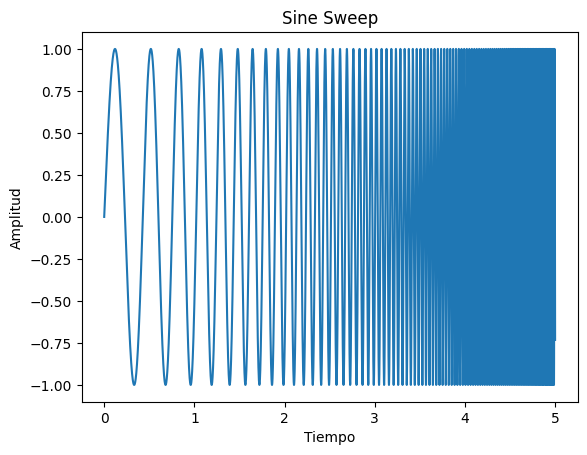

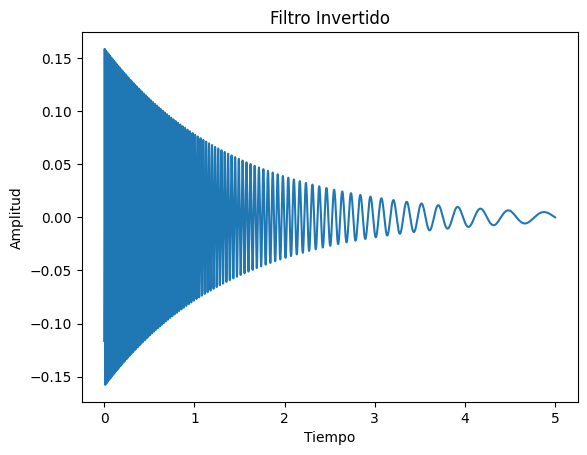

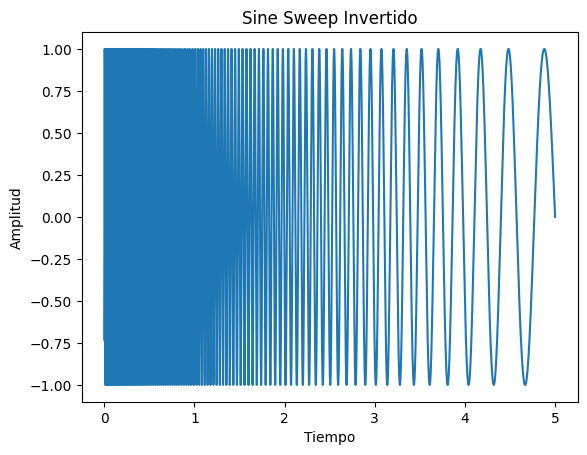

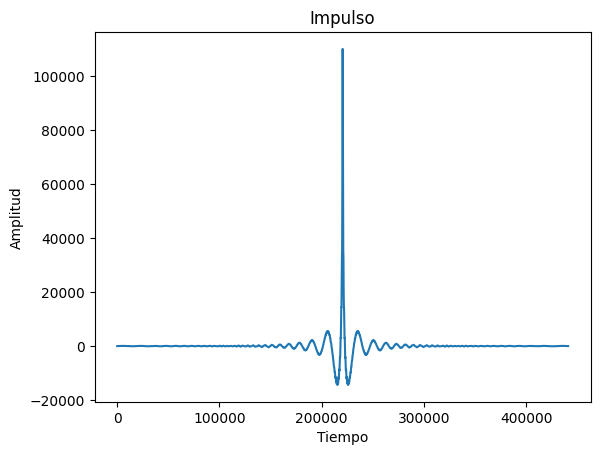

()

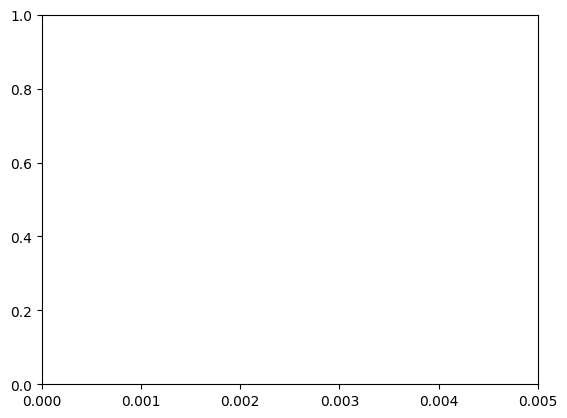

In [16]:
f1, f2, T = get_data()

f, t, R, K, L, w1, fs = get_signal(f1, f2, T)

n = norm_signal(f)

ssi, kt = get_fi(f, K, L, T, t, w1)

get_signalwav(n, fs, kt)

conv = get_convolve(f, kt)

get_plot(t, f, ssi, kt, conv)